<a href="https://colab.research.google.com/github/Psousace/Fundos_Imobiliarios/blob/main/Simulando_Carteiras_Aleat%C3%B3rias_de_FIIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**OBSERVAÇÕES**
1 - O código leva em conta as cotas ajustadas, retiradas do Yahoo Finance

2 - Para IFIX, foi utilizado o ETF XFIX11,uma vez que o Yahoo Finance nãodisponibilia historico do IFIX

3 - ***Para alterar os tickts dos fundos, rode o botão em 'Resultado"***

4 - Se quiser aumentar o numeros de fundos no grafico, altero numero '5' dentro da chave ***"in range(5)"*** para o numero que desejar

# 1. Importando Bibliotecas


In [2]:
# Configurando Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.0/928.0 kB 25.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.16.3-cp310-cp310-linux_x86_64.whl size=826885 sha256=8749505b1c34ab7bd099fab8aa32a1f8214fe475d1b310cc828e18b87f5ef5e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-lwoo6jrx/wheels/c8/ac/6d/ad6d828725ffbe3abc508c95d25dd0c5fcc63539ae47913790
Successfully built peewee
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.28
    Uninstalling yfinance-0.2.28:
      Successfully uninstalled yfinance-0.2.28


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random

# 2. Obtendo e tratando os dados

In [4]:
tickers_ibov = ['ABCP11.SA', 'ALZR11.SA', 'BARI11.SA', 'BBPO11.SA', 'BCIA11.SA', 'BCRI11.SA', 'BPFF11.SA', 'BRCO11.SA',
          'BTLG11.SA', 'CVBI11.SA', 'FIGS11.SA', 'FIIB11.SA', 'HFOF11.SA', 'HGBS11.SA', 'HGCR11.SA', 'HGFF11.SA',
          'HGLG11.SA', 'HGPO11.SA', 'HGRE11.SA', 'HGRU11.SA', 'HSML11.SA', 'JSRE11.SA', 'KFOF11.SA', 'KNCR11.SA',
          'KNHY11.SA', 'KNIP11.SA', 'KNRI11.SA', 'LVBI11.SA', 'MALL11.SA', 'PLCR11.SA', 'PVBI11.SA', 'RBRF11.SA',
          'RBVA11.SA', 'RECR11.SA', 'TRBL11.SA', 'TRXF11.SA', 'VCJR11.SA', 'VGIP11.SA', 'VGIR11.SA', 'VILG11.SA',
          'VISC11.SA', 'XPIN11.SA', 'XPLG11.SA', 'XPML11.SA', 'XPSF11.SA']
dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

# ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ifix = yf.download('XFIX11.SA', period='1y')["Adj Close"]
ifix = ifix / ifix.iloc[0]

[*********************100%%**********************]  45 of 45 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
dados_yahoo

,ABCP11.SA,ALZR11.SA,BARI11.SA,BBPO11.SA,BCIA11.SA,BCRI11.SA,BPFF11.SA,BRCO11.SA,BTLG11.SA,CVBI11.SA,...,TRXF11.SA,VCJR11.SA,VGIP11.SA,VGIR11.SA,VILG11.SA,VISC11.SA,XPIN11.SA,XPLG11.SA,XPML11.SA,XPSF11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-26,69.756966,108.587624,86.074532,81.276566,85.181816,92.353683,62.827980,100.810310,95.031639,81.059097,...,102.422318,80.499619,80.490578,8.694229,101.916725,99.261940,73.900772,100.767502,93.802475,6.899111
2022-09-27,68.641380,108.791489,85.358780,81.365211,83.822151,92.371399,62.390671,100.021858,94.730103,80.612244,...,102.612389,80.966400,80.682579,8.711584,101.216400,99.234825,73.640961,99.173531,93.757362,6.872541
2022-09-28,67.267616,108.698845,84.952316,81.409523,84.146301,91.715965,61.935524,99.838493,94.154427,80.817787,...,102.711967,80.203400,81.459686,8.676876,100.709579,99.108391,74.160568,98.816269,93.784431,6.748552
2022-09-29,67.304512,108.708099,84.855103,81.338600,85.307869,92.725685,61.881981,99.471786,93.962524,80.880348,...,102.965424,79.987976,81.148842,8.694229,100.764877,99.117416,73.372192,99.805611,93.477638,6.721983
2022-09-30,67.866913,108.633949,84.651871,81.453827,84.479469,92.380249,63.309891,99.471786,94.117874,80.603310,...,104.205521,80.885597,82.328217,8.737612,101.760063,100.698013,74.268089,100.648415,93.441559,6.792834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,67.379997,115.879997,84.599998,95.489998,102.209999,70.199997,73.099998,123.300003,101.879997,93.040001,...,112.599998,92.080002,89.220001,9.710000,107.930000,120.769997,81.300003,113.739998,110.800003,8.600000
2023-09-21,67.989998,115.940002,84.620003,96.930000,102.000000,69.800003,72.680000,124.879997,101.900002,94.080002,...,112.199997,92.650002,88.550003,9.700000,106.389999,120.800003,81.599998,113.070000,110.000000,8.620000
2023-09-22,67.389999,116.290001,84.589996,96.750000,102.209999,70.139999,72.330002,126.959999,101.500000,93.970001,...,112.489998,93.000000,88.599998,9.700000,106.660004,120.940002,82.110001,113.540001,110.980003,8.520000


In [6]:
dados_yahoo.dropna(how='all', inplace=True) # removendo linhas sem informação (NaN)
dados_yahoo.dropna(axis=1, inplace=True, thresh=251) #removendo colunas sem informação - 249 = numero de dias pregão

In [7]:
retorno = dados_yahoo.pct_change()
retorno

,ABCP11.SA,ALZR11.SA,BARI11.SA,BBPO11.SA,BCIA11.SA,BCRI11.SA,BPFF11.SA,BRCO11.SA,BTLG11.SA,CVBI11.SA,...,TRXF11.SA,VCJR11.SA,VGIP11.SA,VGIR11.SA,VILG11.SA,VISC11.SA,XPIN11.SA,XPLG11.SA,XPML11.SA,XPSF11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-27,-0.015992,0.001877,-0.008315,0.001091,-0.015962,0.000192,-0.006960,-0.007821,-0.003173,-0.005513,...,0.001856,0.005799,0.002385,0.001996,-0.006872,-0.000273,-0.003516,-0.015818,-0.000481,-0.003851
2022-09-28,-0.020014,-0.000852,-0.004762,0.000545,0.003867,-0.007096,-0.007295,-0.001833,-0.006077,0.002550,...,0.000970,-0.009424,0.009632,-0.003984,-0.005007,-0.001274,0.007056,-0.003602,0.000289,-0.018041
2022-09-29,0.000548,0.000085,-0.001144,-0.000871,0.013804,0.011009,-0.000864,-0.003673,-0.002038,0.000774,...,0.002468,-0.002686,-0.003816,0.002000,0.000549,0.000091,-0.010631,0.010012,-0.003271,-0.003937
2022-09-30,0.008356,-0.000682,-0.002395,0.001417,-0.009711,-0.003725,0.023075,0.000000,0.001653,-0.003425,...,0.012044,0.011222,0.014533,0.004990,0.009876,0.015947,0.012210,0.008444,-0.000386,0.010540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,-0.007073,0.000691,0.003440,0.005158,-0.000782,0.000428,-0.001366,-0.029210,-0.006630,-0.009581,...,-0.004421,0.002177,-0.007564,0.008307,0.018208,-0.018848,0.003952,-0.001405,-0.009742,0.000000
2023-09-21,0.009053,0.000518,0.000236,0.015080,-0.002055,-0.005698,-0.005746,0.012814,0.000196,0.011178,...,-0.003552,0.006190,-0.007510,-0.001030,-0.014269,0.000248,0.003690,-0.005891,-0.007220,0.002326
2023-09-22,-0.008825,0.003019,-0.000355,-0.001857,0.002059,0.004871,-0.004816,0.016656,-0.003925,-0.001169,...,0.002585,0.003778,0.000565,0.000000,0.002538,0.001159,0.006250,0.004157,0.008909,-0.011601


In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABCP11.SA,ALZR11.SA,BARI11.SA,BBPO11.SA,BCIA11.SA,BCRI11.SA,BPFF11.SA,BRCO11.SA,BTLG11.SA,CVBI11.SA,...,TRXF11.SA,VCJR11.SA,VGIP11.SA,VGIR11.SA,VILG11.SA,VISC11.SA,XPIN11.SA,XPLG11.SA,XPML11.SA,XPSF11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-09-27,0.984008,1.001877,0.991685,1.001091,0.984038,1.000192,0.993040,0.992179,0.996827,0.994487,...,1.001856,1.005799,1.002385,1.001996,0.993128,0.999727,0.996484,0.984182,0.999519,0.996149
2022-09-28,0.964314,1.001024,0.986962,1.001636,0.987843,0.993095,0.985795,0.990360,0.990769,0.997023,...,1.002828,0.996320,1.012040,0.998004,0.988156,0.998453,1.003515,0.980636,0.999808,0.978177
2022-09-29,0.964843,1.001109,0.985833,1.000763,1.001480,1.004028,0.984943,0.986722,0.988750,0.997795,...,1.005303,0.993644,1.008178,1.000000,0.988698,0.998544,0.992847,0.990454,0.996537,0.974326
2022-09-30,0.972905,1.000427,0.983472,1.002181,0.991755,1.000288,1.007670,0.986722,0.990385,0.994377,...,1.017410,1.004795,1.022830,1.004990,0.998463,1.014468,1.004970,0.998818,0.996152,0.984596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,0.965925,1.067157,0.982869,1.174877,1.199904,0.760121,1.163494,1.223089,1.072064,1.147805,...,1.099370,1.143856,1.108453,1.116833,1.059002,1.216680,1.100124,1.128737,1.181206,1.246538
2023-09-21,0.974670,1.067709,0.983102,1.192595,1.197439,0.755790,1.156809,1.238762,1.072274,1.160635,...,1.095464,1.150937,1.100129,1.115683,1.043891,1.216982,1.104183,1.122088,1.172677,1.249436
2023-09-22,0.966068,1.070932,0.982753,1.190380,1.199904,0.759472,1.151239,1.259395,1.068065,1.159278,...,1.098296,1.155285,1.100750,1.115683,1.046541,1.218392,1.111084,1.126752,1.183124,1.234942


# 3. Resultados

In [18]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 1000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,HGFF11.SA,XPLG11.SA,VISC11.SA,PLCR11.SA,BPFF11.SA,saldo,retorno
Date,,,,,,,
2022-09-26,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2022-09-27,978.502532,984.181693,999.726835,991.449051,993.039578,4946.899689,-0.010620
2022-09-28,986.231829,980.636288,998.453091,993.644434,985.795245,4944.760887,-0.000432
2022-09-29,1000.966073,990.454351,998.544018,990.178039,984.943028,4965.085509,0.004110
2022-09-30,989.009646,998.818198,1014.467512,997.804413,1007.670320,5007.770089,0.008597
...,...,...,...,...,...,...,...
2023-09-20,1179.794374,1128.736902,1216.679793,1213.192643,1163.494329,5901.898042,-0.008469
2023-09-21,1191.687185,1122.087951,1216.982088,1226.524431,1156.809438,5914.091094,0.002066
2023-09-22,1201.575568,1126.752166,1218.392492,1227.857589,1151.238696,5925.816510,0.001983


<Axes: xlabel='Date'>

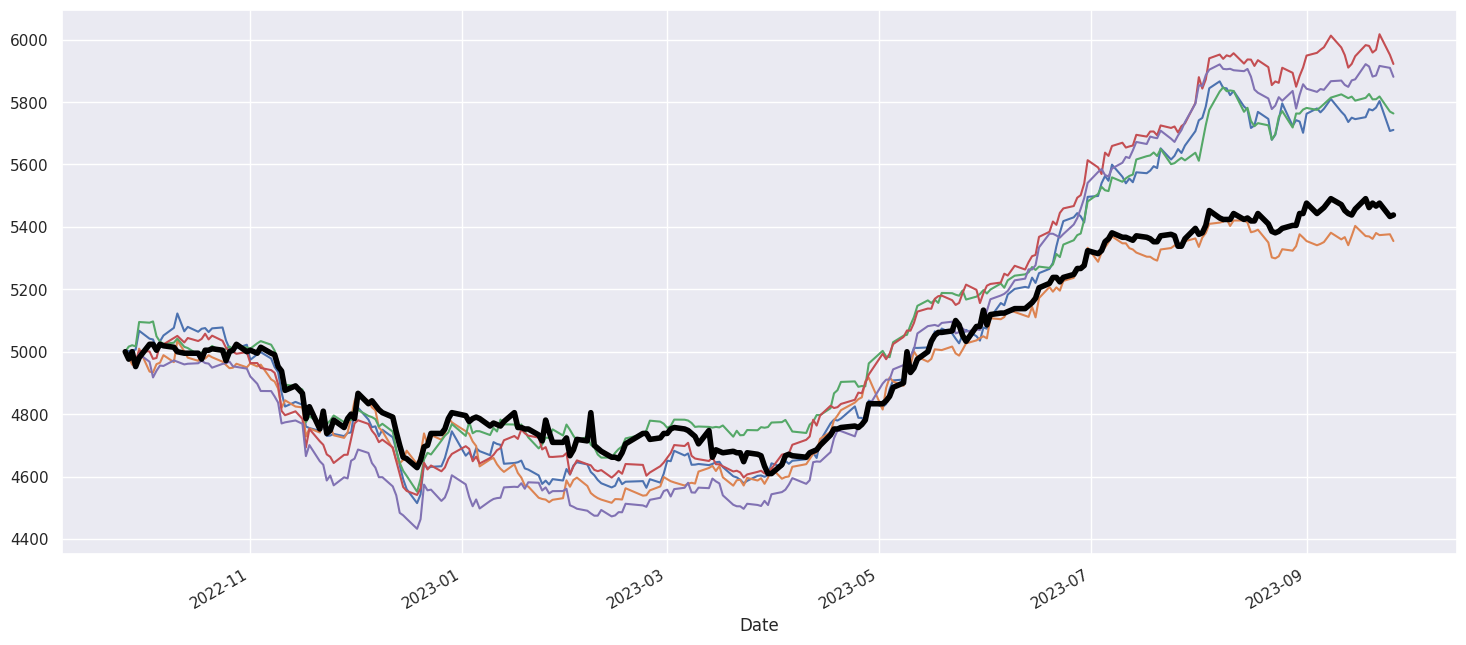

In [16]:
for i in range(5):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 1000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ifix*5000).plot(linewidth=4, color='black')



array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

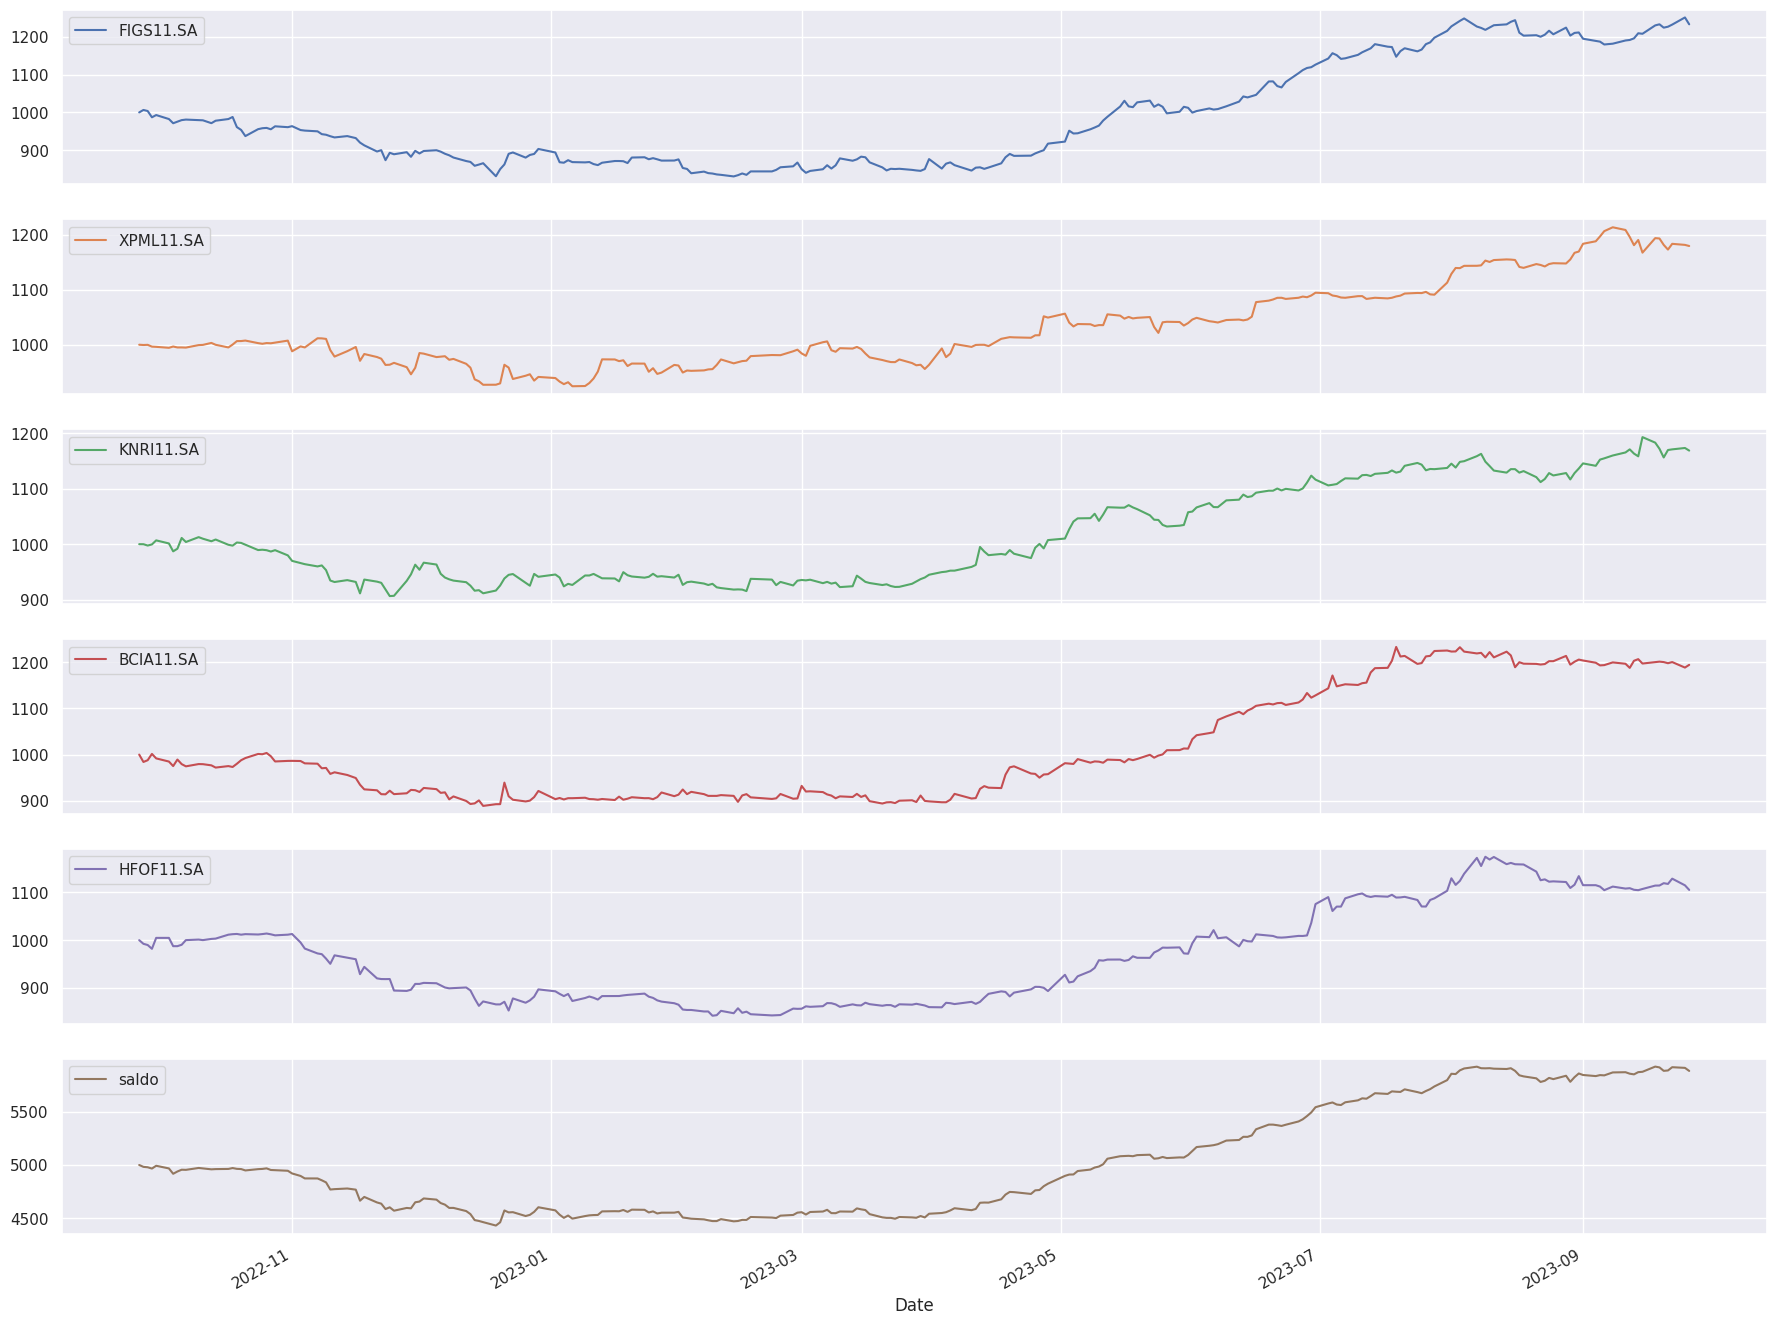

In [17]:
carteira.plot(subplots=True, figsize=(22,18))